# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st 
import numpy as np



# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_metadata_df = pd.DataFrame(mouse_metadata)
study_results_df = pd.DataFrame(study_results)
tumor_volume = ['Tumor Volume (mm3)']

mousemeta_study_df = study_results_df.merge(mouse_metadata_df, how='left')

# Display the data table for preview
mousemeta_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_count = len(mouse_metadata)





mouse_count


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mousemeta_study_df=[mousemeta_study_df.duplicated(subset=['Mouse ID','Timepoint'])]



In [4]:
# Optional: Get all the data for the duplicate mouse ID.



mousemeta_study_df[mousemeta_study_df["Mouse ID"] == 'g989'].head()

TypeError: list indices must be integers or slices, not str

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#study_results[study_results.duplicated(subset=['Mouse ID','Timepoint'])]

cleaned_mouse_df = mousemeta_study_df.drop_duplicated(mousemeta_study_df[mousemeta_study_df['Mouse ID'] == 'g989'].index) 
cleaned_mouse_df.head()

 

AttributeError: 'list' object has no attribute 'drop_duplicated'

In [ ]:
# Checking the number of mice in the clean DataFrame.
cleaned_mouse_df['Mouse ID'].nunique()


248

## Summary Statistics

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame



volume_mean = cleaned_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
volume_median = cleaned_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
volume_variance =cleaned_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
volume_std_dev = cleaned_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()


sem_volume = pd.DataFrame(cleaned_mouse_df)

sem_volume_final = (sem_volume.sem())

        
descriptive_stats=pd.DataFrame({'Mean Tumor Volume':volume_mean,
'Median Tumor Volume': volume_median,
'Tumor Volume Variance': volume_variance,
'Tumor Volume Std. Dev.' : volume_std_dev,
'Tumor Volume Std. Err.' : sem_volume_final
})

cleaned_descriptive_data= descriptive_stats.dropna(subset=['Mean Tumor Volume'])



#All of this was working with the exception of std error not showing properly and now it is saying that cleaed_mouse_df is not defined and won't run any groupby functions 








 






cleaned_descriptive_data





NameError: name 'cleaned_mouse_df' is not defined

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

## Bar and Pie Charts

In [ ]:
# Filter the DataFrame down only to those columns to chart















TypeError: 'type' object is not subscriptable

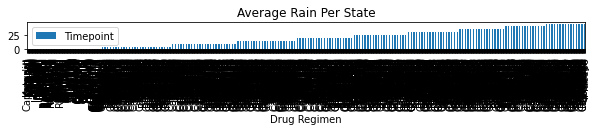

<Figure size 432x288 with 0 Axes>

In [ ]:


# Use DataFrame.plot() in order to create a bar chart of the data



In [ ]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.


In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas


In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [ ]:
 #Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

